In [1]:
import pandas as pd
import numpy as np
import hmm
import helper_functions as hf
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm_notebook as tqdm
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cow_1 = pd.read_json('data/cowrie_1.json', lines=True)
cow_3 = pd.read_json('data/cowrie_3.json', lines=True)
cow_4 = pd.read_json('data/cowrie_4.json', lines=True)

In [3]:
k,le = hf.process_data(cow_1,cow_3,cow_4)

processed data samples: 

                                             eventid
0                                           [12, 11]
1  [12, 10, 8, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 4, 4...
2                                 [12, 10, 8, 7, 11]
3                                    [12, 1, 10, 11]
4                                    [12, 1, 10, 11]


Data Shape : (1058090, 30)


,compCS,data,dst_ip,dst_port,duration,encCS,eventid,height,input,isError,...,size,src_ip,src_port,system,timestamp,ttylog,url,username,version,width
0,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,...,NaN,116.31.116.16,39547.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:07.569246,NaN,NaN,NaN,NaN,NaN
1,[none],NaN,NaN,NaN,NaN,"[aes128-ctr, aes192-ctr, aes256-ctr, aes256-cb...",cowrie.client.version,NaN,NaN,0.0,...,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:08.235671,NaN,NaN,NaN,SSH-2.0-PUTTY,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,cowrie.login.success,NaN,NaN,0.0,...,NaN,116.31.116.16,NaN,SSHService 'ssh-userauth' on HoneyPotSSHTransp...,2017-07-03 18:30:10.585142,NaN,NaN,root,NaN,NaN
3,NaN,NaN,NaN,NaN,9.96463,NaN,cowrie.session.closed,NaN,NaN,0.0,...,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:17.902600,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,...,NaN,116.31.116.16,22040.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:44.657703,NaN,NaN,NaN,NaN,NaN


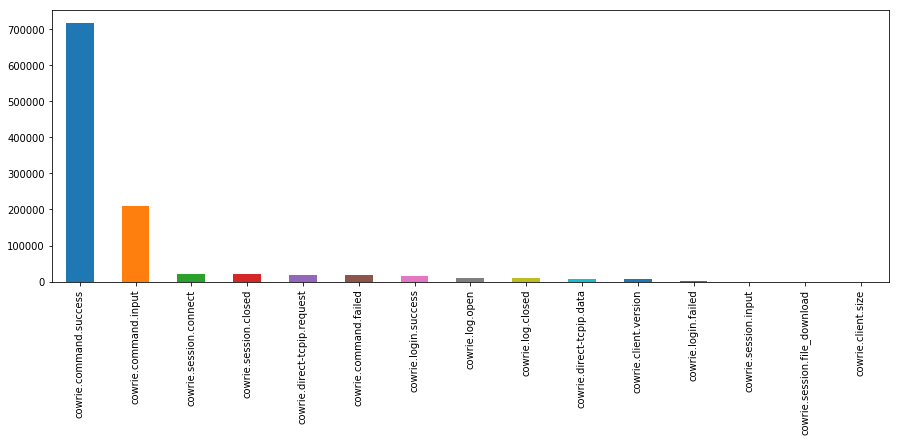

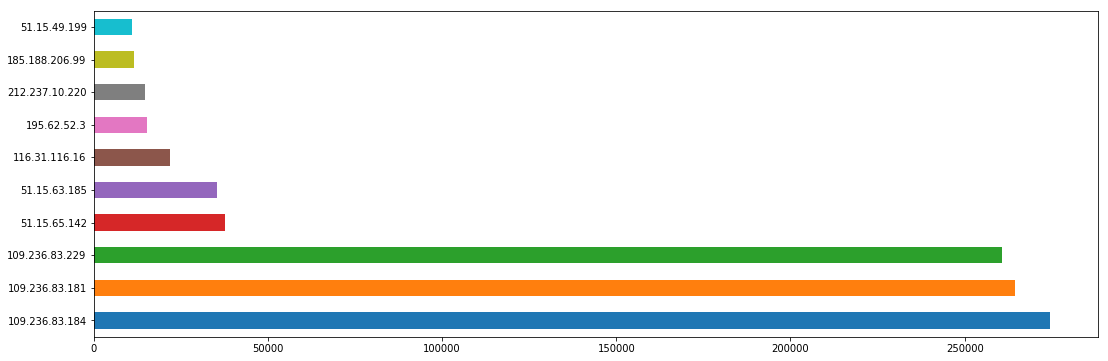

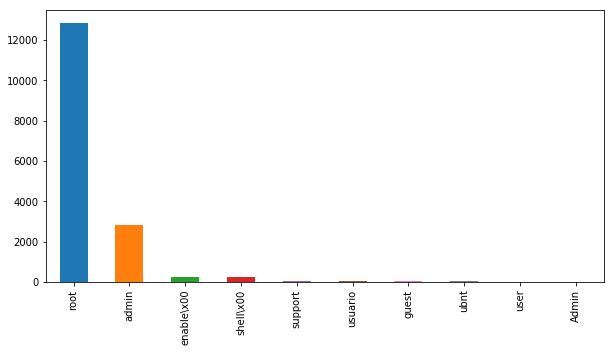

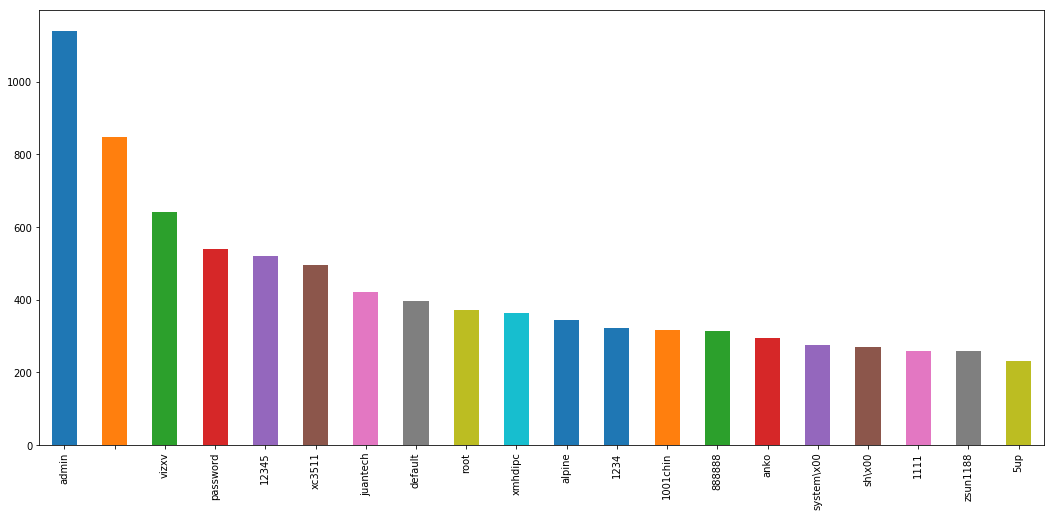

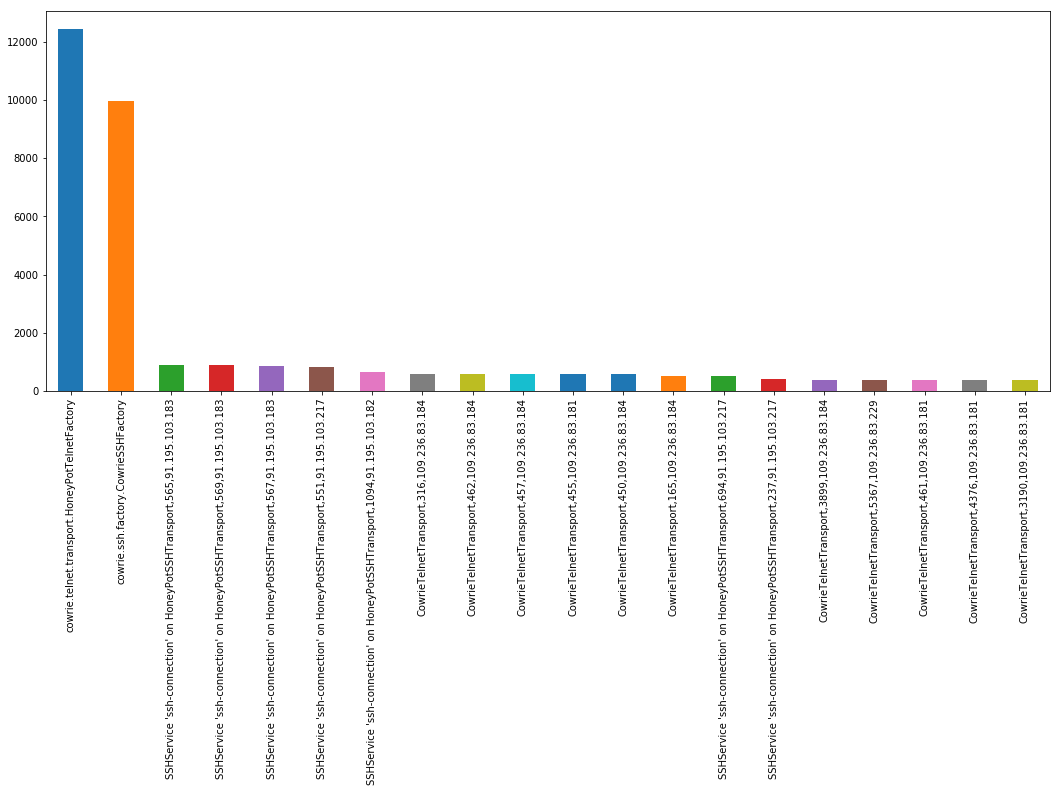

In [4]:
hf.vis(cow_1,cow_3,cow_4)

In [5]:
# If direct seq_events available
# k = hf.load_pickle('seq_events.txt')

In [6]:
hf.sample_per_seq(k, 3000)

Top maximum number of sequence length: 

    length  no of samples
0      2.0         5237.0
1      4.0         4959.0
2    199.0         3032.0
3      5.0         1903.0
4      3.0         1481.0
5     71.0          659.0
6     31.0          637.0
7    129.0          625.0
8      6.0          549.0
9     23.0          482.0
10   194.0          443.0
11   197.0          418.0
12    15.0          326.0
13    19.0          306.0
14    69.0          188.0
15    26.0          119.0
16     7.0          114.0
17    16.0          112.0
18    11.0           65.0
19    13.0           65.0


In [7]:
length = 7

In [8]:
data = hf.desired_seq(k,length)

HBox(children=(IntProgress(value=0, max=22449), HTML(value='')))


total samples found: 114

few samples of data of sequence length 7
[[12  1 10  6  6  5 11]
 [12  1 10  0  8  7 11]
 [12  1 10  6  6  5 11]
 [12  1 10  0  8  7 11]
 [12  1 10  0  8  7 11]]


In [9]:
N = 17
M = 17
T = length

In [10]:
mod = hmm.HMM(N, M, T)

In [11]:
print (mod.train(data))

Update #1 Log Probability: -0.31788610577432047 -- Mean Error 0.0012036957824197283
Update #1 Probability: 3.147624757881991e-05
Update #2 Log Probability: -0.05640544312813583 -- Mean Error 0.0014485000243595154
Update #2 Probability: 0.0008507326352022972
Update #3 Log Probability: -0.030614053536459192 -- Mean Error 0.00047294980207124537
Update #3 Probability: 0.003097289413088797
Update #4 Log Probability: -0.02232047794712036 -- Mean Error 0.00015923903288414732
Update #4 Probability: 0.004948306688423321
Update #5 Log Probability: -0.013072072722309354 -- Mean Error 0.00026224856657315946
Update #5 Probability: 0.008414690811228873
Update #6 Log Probability: -0.004418471401552752 -- Mean Error 0.0003498637715806496
Update #6 Probability: 0.013695132200757305
Update #7 Log Probability: -0.0009697458620579479 -- Mean Error 8.562880568735687e-05
Update #7 Probability: 0.01660148206027276
Update #8 Log Probability: -0.0007447939783559586 -- Mean Error 2.4159233414198915e-06
Update #

In [12]:
result = hf.calculate_probablity(mod,data)

HBox(children=(IntProgress(value=0, max=114), HTML(value='')))


result samples: 

                        seq  prob
0  [12, 1, 10, 6, 6, 5, 11]   0.0
1  [12, 1, 10, 0, 8, 7, 11]   0.0
2  [12, 1, 10, 6, 6, 5, 11]   0.0
3  [12, 1, 10, 0, 8, 7, 11]   0.0
4  [12, 1, 10, 0, 8, 7, 11]   0.0

 Further analysis of results:  

             prob
count  114.000000
mean     0.016988
std      0.127688
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      0.968321

 Max probablity sequence: 

seq     [12, 1, 10, 6, 6, 6, 11]
prob                    0.968321
Name: 8, dtype: object


In [13]:
hf.next_highprob_action(mod,[13, 1],15,le)

The given seq itself is highly unlikely


,seq,prob
0,"[13, 1, 0]",0.0
1,"[13, 1, 1]",0.0
2,"[13, 1, 2]",0.0
3,"[13, 1, 3]",0.0
4,"[13, 1, 4]",0.0
5,"[13, 1, 5]",0.0
6,"[13, 1, 6]",0.0
7,"[13, 1, 7]",0.0
8,"[13, 1, 8]",0.0
9,"[13, 1, 9]",0.0


In [14]:
hf.next_highprob_action(mod,[12, 1, 10, 6, 6],15,le)


 Next highly probable action taken by hacker will be 6 i.e cowrie.direct-tcpip.request


seq     [12, 1, 10, 6, 6, 6]
prob                0.975166
Name: 6, dtype: object

 Next least probable action taken by hacker will be 0 i.e cowrie.client.size


seq     [12, 1, 10, 6, 6, 6]
prob                0.975166
Name: 6, dtype: object




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,seq,prob
0,"[12, 1, 10, 6, 6, 0]",0.000000
1,"[12, 1, 10, 6, 6, 1]",0.000556
2,"[12, 1, 10, 6, 6, 2]",0.000000
3,"[12, 1, 10, 6, 6, 3]",0.000000
4,"[12, 1, 10, 6, 6, 4]",0.000000
5,"[12, 1, 10, 6, 6, 5]",0.000000
6,"[12, 1, 10, 6, 6, 6]",0.975166
7,"[12, 1, 10, 6, 6, 7]",0.000000
8,"[12, 1, 10, 6, 6, 8]",0.000000
9,"[12, 1, 10, 6, 6, 9]",0.000000
